<a href="https://colab.research.google.com/github/laraaraujoo/spark/blob/main/spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixando as **libs**

In [2]:
pip install spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=bc038e6a809e273b32bd1a3588582714daa1bbb9fce16e7fc86f1293870449af
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark


In [1]:
pip install matplotlib

Importando as **libs** e **funções**

In [54]:
import matplotlib.pyplot as plt
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
import spark
from pyspark.sql import SparkSession
import pandas as pd

**SparkSession**
- Permite trabalhar com DataFrames e outras funcionalidades do Spark.
É uma etapa necessária antes de qualquer operação com PySpark.

In [17]:
spark = SparkSession.builder \
    .appName("Exemplo em spark") \
    .getOrCreate()


Criando os **dados**

In [18]:
data = [
    ("Alice", 20, 'F'),
    ("Bob", 50, 'M'),
    ("Charlie", 30, 'M'),
    ("Catherine", 12, 'F'),
    ("Edward", 11, 'M'),
    ("David", 10,'M'),
    ("Michelle", 40, 'F'),
    ("Raphael",35,'M'),
    ("Matheus", 39,'M'),
    ("Rosa",52, 'F')
]


Criando as **colunas**

In [19]:
columns = ["Nome", "Idade","Sexo"]

Criando o **dataframe** com os **dados** e as **colunas**

In [20]:
df = spark.createDataFrame(data, schema=columns)

Visualizando o **dataframe** que acabamos de criar

In [23]:
df.show()

+---------+-----+----+
|     Nome|Idade|Sexo|
+---------+-----+----+
|    Alice|   20|   F|
|      Bob|   50|   M|
|  Charlie|   30|   M|
|Catherine|   12|   F|
|   Edward|   11|   M|
|    David|   10|   M|
| Michelle|   40|   F|
|  Raphael|   35|   M|
|  Matheus|   39|   M|
|     Rosa|   52|   F|
+---------+-----+----+



Usando uma função em **sql** e **pyspark**

In [45]:
soma_idade = df.agg(F.sum("Idade")).collect()[0][0]
display(f'A soma das idades é: {soma_idade}')

'A soma das idades é: 299'

Fazendo a soma dos gêneros, transformando em **Pandas** e plotando no gráfico de barras.

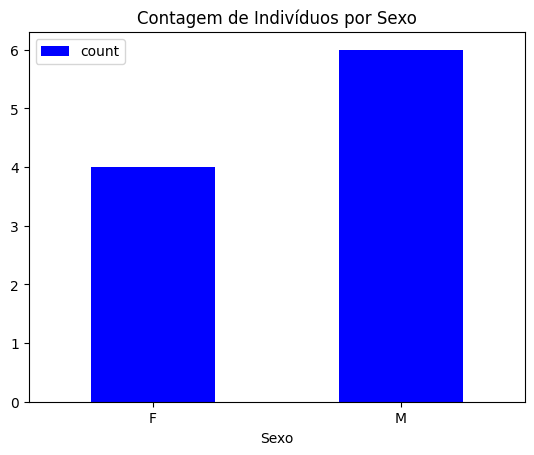

In [58]:
sexo_counts = df.groupBy("Sexo").count()
sexo_counts = sexo_counts.toPandas()


sexo_counts.plot(x="Sexo", y="count",kind='bar', color='blue')
plt.xlabel('Sexo')
plt.title('Contagem de Indivíduos por Sexo')
plt.xticks(rotation=0)
plt.show()